In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import export_text


In [9]:
paths = ["prices_round_3_day_0.csv", "prices_round_3_day_1.csv", "prices_round_3_day_2.csv"]


df = pd.DataFrame()
for i, path in enumerate(paths):
    new_df = pd.read_csv(path, delimiter=";")
    # add 1000000 to timestamp column
    new_df["timestamp"] = new_df["timestamp"] + 1000000 * i
    df = pd.concat([df, new_df])

df.head(20)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,CHOCOLATE,7999,111,NaN,NaN,NaN,NaN,8001,111,NaN,NaN,NaN,NaN,8000.0,0.0
1,0,0,STRAWBERRIES,3999,210,NaN,NaN,NaN,NaN,4001,210,NaN,NaN,NaN,NaN,4000.0,0.0
2,0,0,ROSES,14999,72,NaN,NaN,NaN,NaN,15001,72,NaN,NaN,NaN,NaN,15000.0,0.0
3,0,0,GIFT_BASKET,71348,19,71347.0,24.0,NaN,NaN,71362,19,71363.0,24.0,NaN,NaN,71355.0,0.0
4,0,100,GIFT_BASKET,71344,1,71343.0,12.0,71342.0,20.0,71355,1,71356.0,12.0,71357.0,20.0,71349.5,0.0
5,0,100,CHOCOLATE,8001,52,8000.0,95.0,NaN,NaN,8002,147,NaN,NaN,NaN,NaN,8001.5,0.0
6,0,100,ROSES,14999,66,NaN,NaN,NaN,NaN,15001,66,NaN,NaN,NaN,NaN,15000.0,0.0
7,0,100,STRAWBERRIES,3999,265,NaN,NaN,NaN,NaN,4000,265,NaN,NaN,NaN,NaN,3999.5,0.0
8,0,200,ROSES,15000,61,NaN,NaN,NaN,NaN,15001,21,15002.0,40.0,NaN,NaN,15000.5,0.0
9,0,200,GIFT_BASKET,71344,4,71339.0,1.0,71338.0,14.0,71350,1,71351.0,14.0,71352.0,21.0,71347.0,0.0


370.2306 85.2931783102648


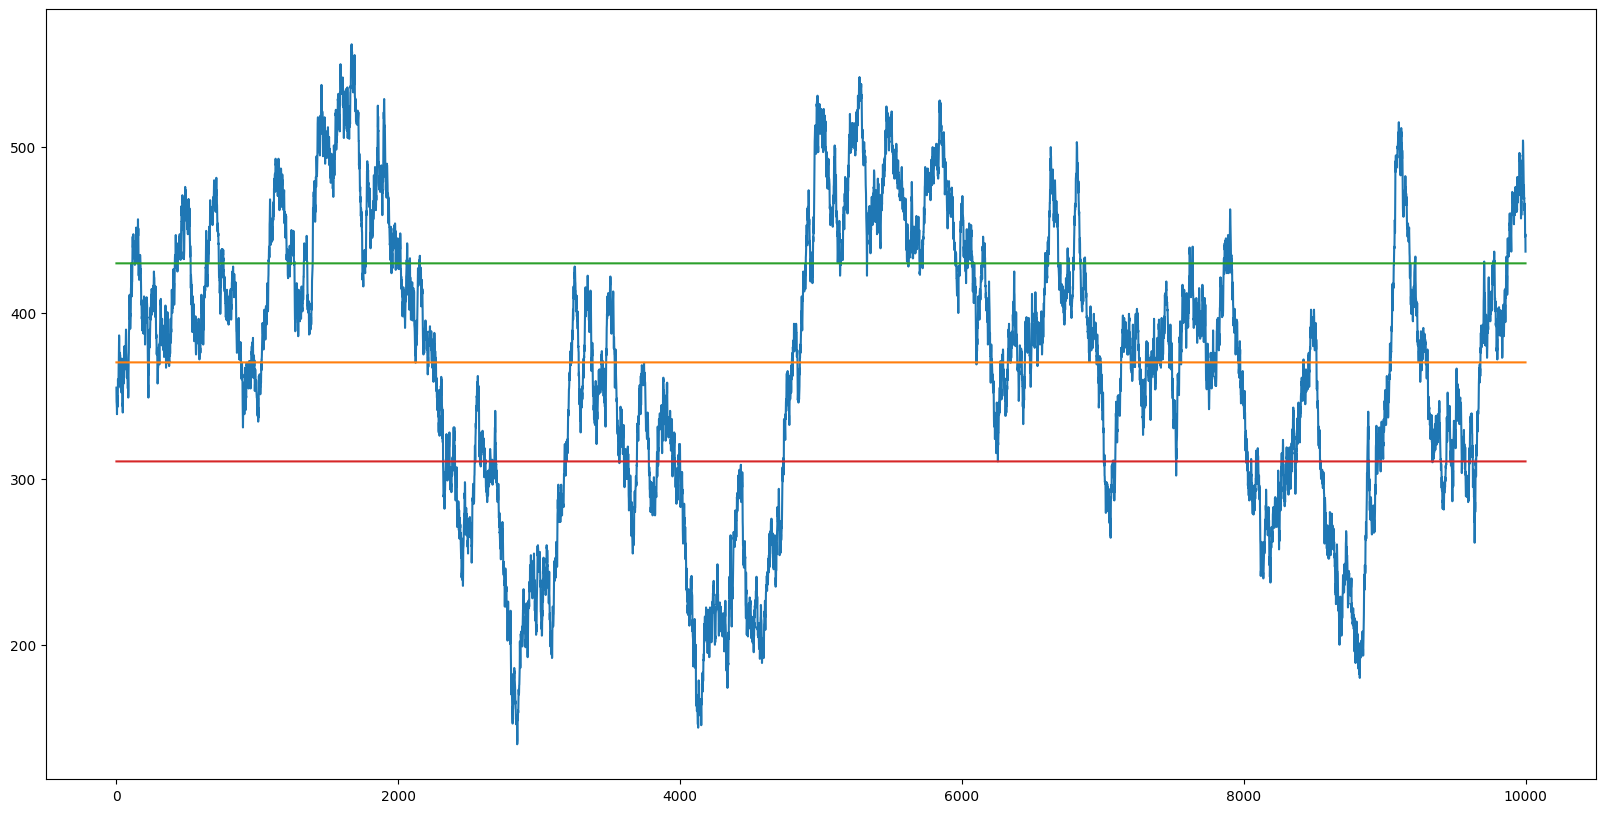

In [7]:
size = 10000

basket_midprices = df[df["product"] == "GIFT_BASKET"]['mid_price'].to_list()[0:size]
straw_midprices = df[df["product"] == "STRAWBERRIES"]['mid_price'].to_list()[0:size]
choco_midprices = df[df["product"] == "CHOCOLATE"]['mid_price'].to_list()[0:size]
roses_midprices = df[df["product"] == "ROSES"]['mid_price'].to_list()[0:size]

difference = []

times = [i for i in range(size)]

for i in range(len(basket_midprices)):
    diff = basket_midprices[i] - 6*straw_midprices[i] - 4*choco_midprices[i] - roses_midprices[i]
    difference.append(diff)

mean, std = statistics.mean(difference), statistics.stdev(difference)
print(mean, std)

factor = 0.7

plt.figure(figsize=(20, 10))
plt.plot(times, difference)
plt.plot(times, [mean for i in range(size)])
plt.plot(times, [mean+factor*std for i in range(size)])
plt.plot(times, [mean-factor*std for i in range(size)])

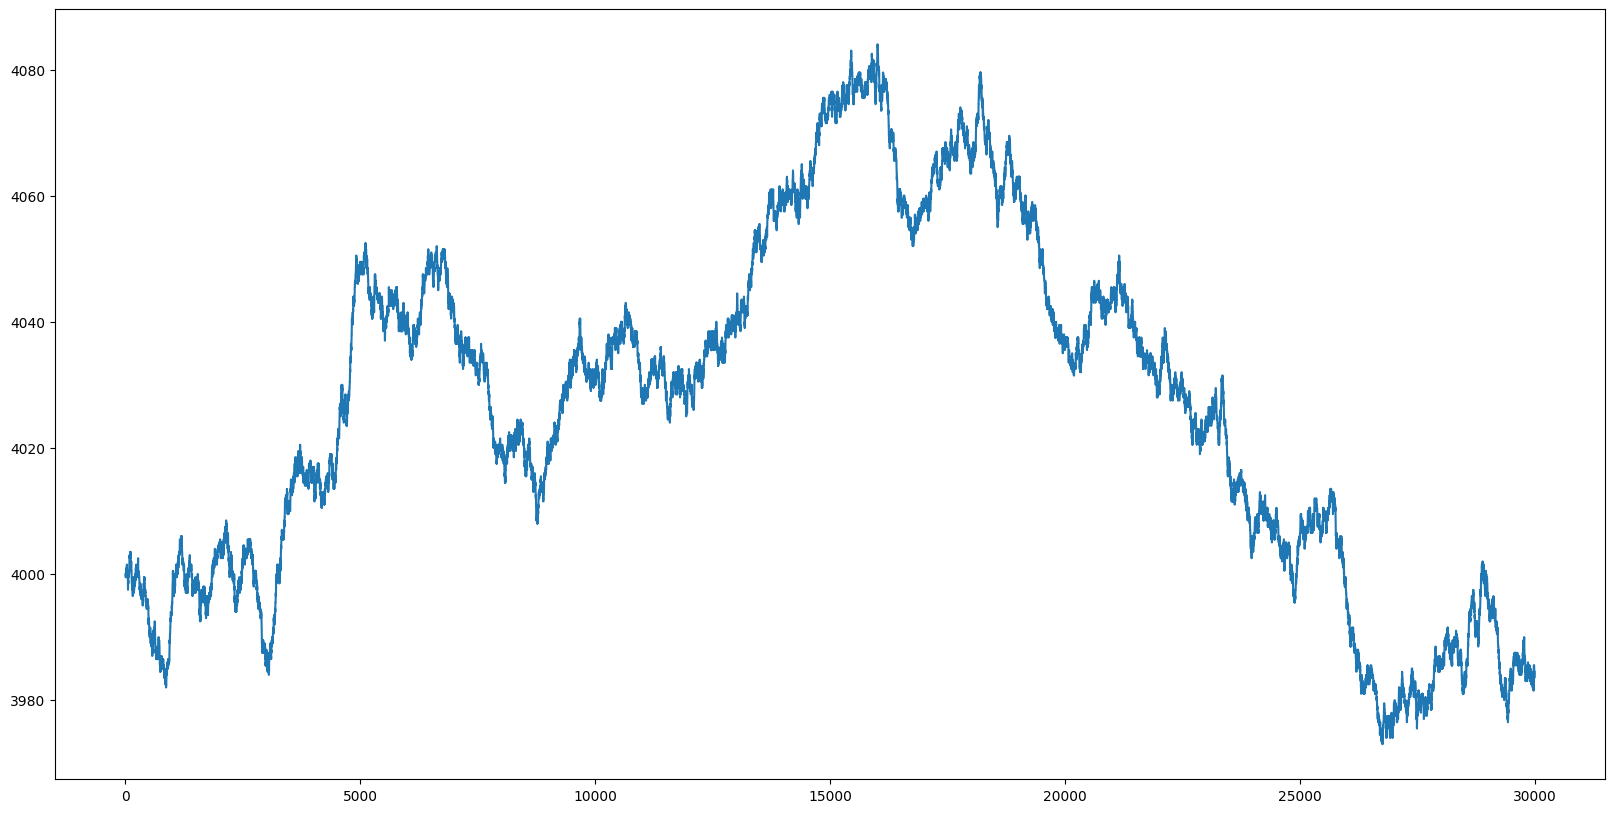

In [4]:
plt.figure(figsize=(20, 10))
plt.plot(times, straw_midprices)
# plt.plot(times, choco_midprices)
# plt.plot(times, roses_midprices)

In [5]:
df['mid_price'].std
statistics.stdev(df['mid_price'])

27062.706598638768